In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import decomposition

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import kruskal





In [3]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [4]:
data = pd.read_csv("Notebook_openfoodfacts_clean2.csv", low_memory= False )


In [5]:
data.head()

,Unnamed: 0,countries_fr,product_name,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,...,nutrition_grade_fr,nutrition-score-fr_100g,fiber_100g,additives_fr,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
0,2,États-Unis,Peanuts,1941.0,17.9,0.6,0.2,0.0,0.0,0.0,...,2.0,10.0,7.1,NaN,0.0,5.4,0.1,0.0,0.0,0.0
1,3,États-Unis,Organic Salted Nut Mix,2540.0,17.9,1.2,0.5,0.0,0.0,0.0,...,4.0,12.0,7.1,NaN,0.0,16.8,0.1,0.0,0.0,0.0
2,5,États-Unis,Breadshop Honey Gone Nuts Granola,1933.0,13.5,0.9,0.3,0.0,0.0,0.0,...,0.0,12.7,7.7,NaN,0.1,3.6,0.0,0.0,0.0,0.0
3,7,États-Unis,Organic Muesli,1833.0,14.1,0.1,0.1,0.0,0.0,2.0,...,3.0,7.0,9.4,"E123 - Amarante,E307a - Tocophérol",0.1,4.9,0.1,0.0,0.0,0.0
4,8,États-Unis,Organic Dark Chocolate Minis,2406.0,5.0,0.1,0.0,0.0,0.0,0.0,...,0.0,21.0,7.5,NaN,0.0,1.4,0.1,0.0,0.0,0.0


In [6]:
data = data.drop(columns = ["Unnamed: 0"], axis =1)

In [7]:
data = data.rename(columns={'nutrition-score-fr_100g': 'nutrition_score_fr_100g'})
data = data.rename(columns={'saturated-fat_100g': 'saturated_fat_100g'})
data = data.rename(columns={'trans-fat_100g': 'trans_fat_100g'})
data = data.rename(columns={'vitamin-a_100g': 'vitamin_a_100g'})
data = data.rename(columns={'vitamin-c_100g': 'vitamin_c_100g'})


In [8]:
def missing_values_proportion(data):
    # Utiliser la méthode "isnull" pour identifier les valeurs manquantes
    missing_values = data.isnull()
    # Appliquer la méthode "mean" pour calculer la proportion de valeurs manquantes par colonne
    missing_values_proportion = missing_values.mean()
    return missing_values_proportion


In [9]:
missing_values_proportion(data)

countries_fr                              0.0
product_name                              0.0
energy_100g                               0.0
proteins_100g                             0.0
salt_100g                                 0.0
sodium_100g                               0.0
ingredients_that_may_be_from_palm_oil_n   0.0
ingredients_from_palm_oil_n               0.0
additives_n                               0.0
additives                                 0.0
sugars_100g                               0.0
fat_100g                                  0.0
carbohydrates_100g                        0.0
saturated_fat_100g                        0.0
nutrition_grade_fr                        0.0
nutrition_score_fr_100g                   0.0
fiber_100g                                0.0
additives_fr                              0.3
cholesterol_100g                          0.0
trans_fat_100g                            0.0
calcium_100g                              0.0
vitamin_c_100g                    

In [10]:
data.describe()

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated_fat_100g,nutrition_grade_fr,nutrition_score_fr_100g,fiber_100g,cholesterol_100g,trans_fat_100g,calcium_100g,vitamin_c_100g,iron_100g,vitamin_a_100g
count,193799.0,193799.0,193799.0,193799.0,193345.0,193345.0,193345.0,193799.0,193799.0,193799.0,193799.0,193799.0,193799.0,193799.0,193799.0,193799.0,193799.0,193799.0,193799.0,193799.0
mean,1188.5,9.1,1.5,0.6,0.1,0.0,2.0,17.1,16.3,34.3,6.3,3.1,10.9,4.6,0.1,3.8,0.1,0.0,0.0,0.0
std,782.4,8.0,4.5,1.8,0.3,0.2,2.5,19.1,16.9,27.5,7.5,1.5,7.6,4.7,0.3,7.0,0.7,0.3,0.1,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,452.0,3.3,0.2,0.1,0.0,0.0,0.0,3.2,3.5,8.6,1.3,2.0,3.3,1.8,0.0,0.6,0.0,0.0,0.0,0.0
50%,1177.0,7.0,0.8,0.3,0.0,0.0,1.0,7.9,11.1,26.7,3.6,3.0,10.7,3.5,0.0,1.4,0.1,0.0,0.0,0.0
75%,1764.0,12.5,1.5,0.6,0.0,0.0,3.0,27.3,25.0,59.4,8.9,4.0,17.0,6.2,0.1,3.7,0.1,0.0,0.0,0.0
max,3761.0,100.0,100.0,39.4,6.0,2.0,31.0,100.0,100.0,100.0,99.9,5.0,40.0,100.0,95.2,100.0,99.0,50.0,25.0,0.8


# analyse univariée et bivariée

In [11]:


def analyse_univariable(df):
    # selectionner les colonne de type float
    float_cols = df.select_dtypes(include=['float'])
    # pour chaque colonne de type float
    for col in float_cols:
        # Utiliser la fonction describe() pour obtenir des statistiques de base sur la colonne
        print(df[col].describe())
        print("\n")
        
        median = df[col].median()
        mean = df[col].mean()
        
        
        # Afficher un histogramme de la colonne en utilisant seaborn.displot()
        sns.displot(df[col], kde=True, bins=20)
        plt.axvline(median, color='r', linestyle='--')
        plt.axvline(mean, color='g', linestyle='-')
        plt.xlabel(col)
        plt.show()

        # Afficher un diagramme de boîte de la colonne
        df[col].plot.box()
        plt.ylabel(col)
        plt.show()


count   193799.0
mean      1188.5
std        782.4
min          0.0
25%        452.0
50%       1177.0
75%       1764.0
max       3761.0
Name: energy_100g, dtype: float64




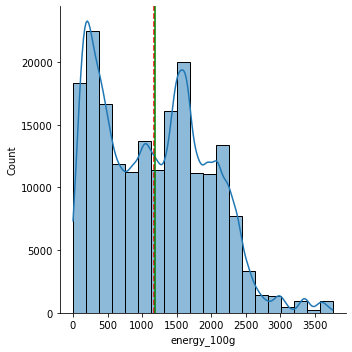

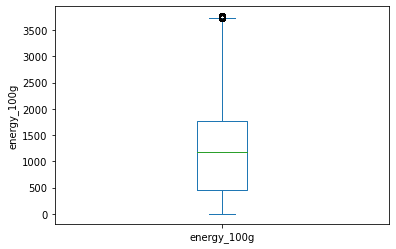

count   193799.0
mean         9.1
std          8.0
min          0.0
25%          3.3
50%          7.0
75%         12.5
max        100.0
Name: proteins_100g, dtype: float64




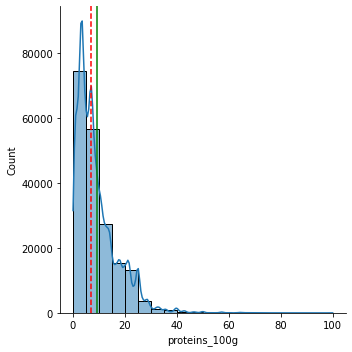

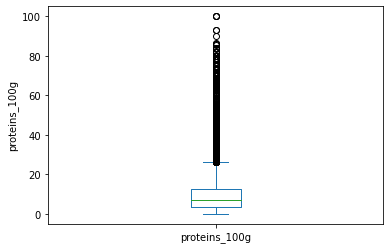

count   193799.0
mean         1.5
std          4.5
min          0.0
25%          0.2
50%          0.8
75%          1.5
max        100.0
Name: salt_100g, dtype: float64




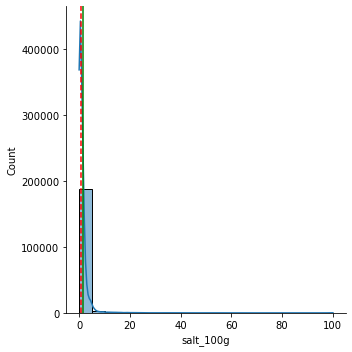

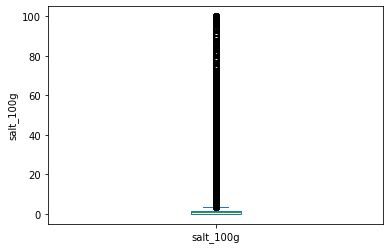

count   193799.0
mean         0.6
std          1.8
min          0.0
25%          0.1
50%          0.3
75%          0.6
max         39.4
Name: sodium_100g, dtype: float64




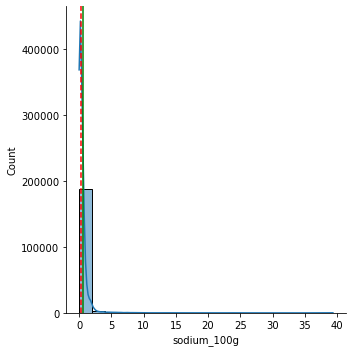

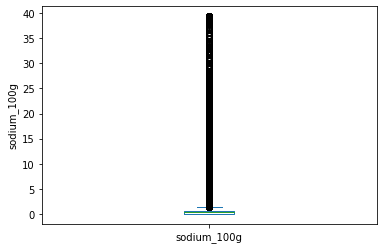

count   193345.0
mean         0.1
std          0.3
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          6.0
Name: ingredients_that_may_be_from_palm_oil_n, dtype: float64




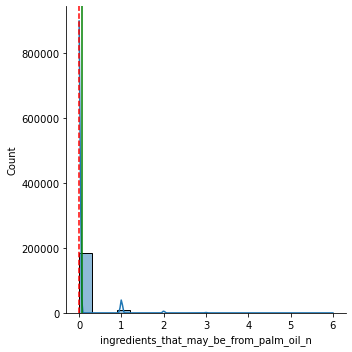

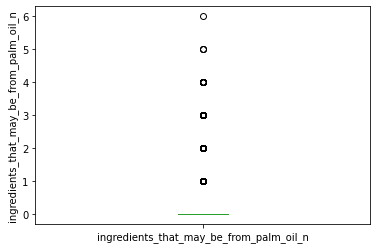

count   193345.0
mean         0.0
std          0.2
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          2.0
Name: ingredients_from_palm_oil_n, dtype: float64




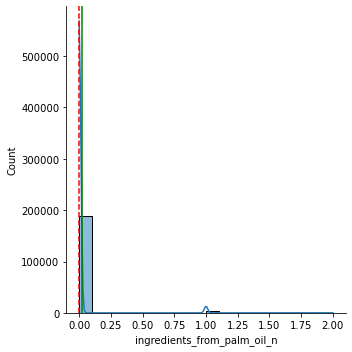

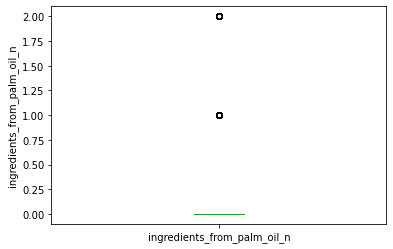

count   193345.0
mean         2.0
std          2.5
min          0.0
25%          0.0
50%          1.0
75%          3.0
max         31.0
Name: additives_n, dtype: float64




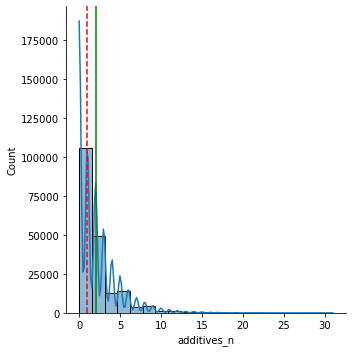

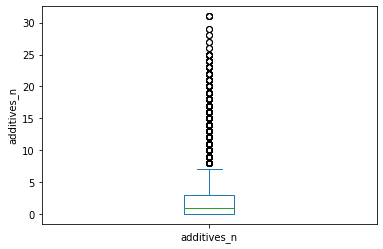

count   193799.0
mean        17.1
std         19.1
min          0.0
25%          3.2
50%          7.9
75%         27.3
max        100.0
Name: sugars_100g, dtype: float64




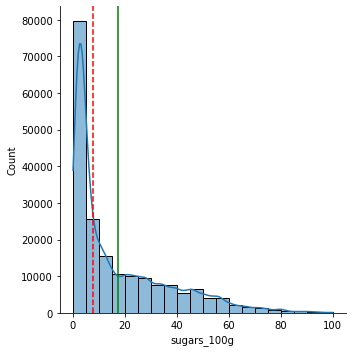

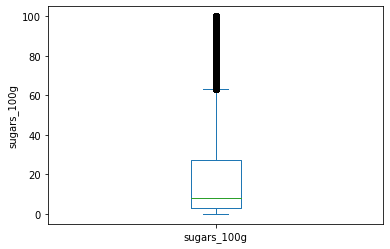

count   193799.0
mean        16.3
std         16.9
min          0.0
25%          3.5
50%         11.1
75%         25.0
max        100.0
Name: fat_100g, dtype: float64




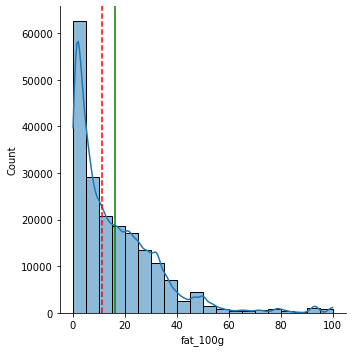

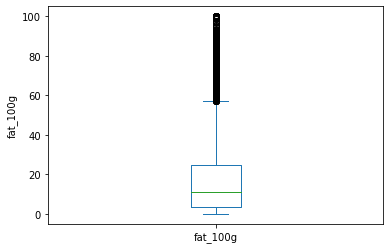

count   193799.0
mean        34.3
std         27.5
min          0.0
25%          8.6
50%         26.7
75%         59.4
max        100.0
Name: carbohydrates_100g, dtype: float64




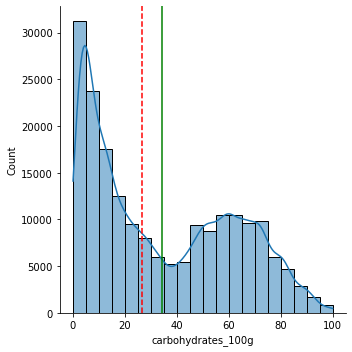

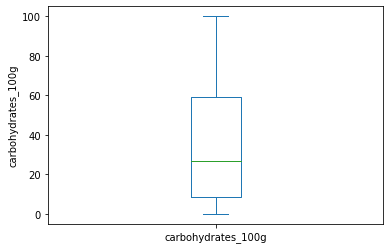

count   193799.0
mean         6.3
std          7.5
min          0.0
25%          1.3
50%          3.6
75%          8.9
max         99.9
Name: saturated_fat_100g, dtype: float64




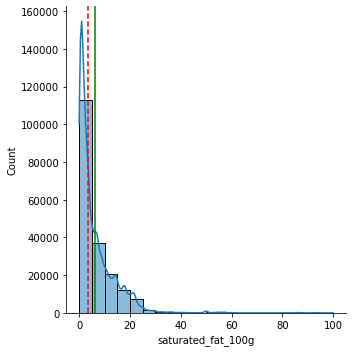

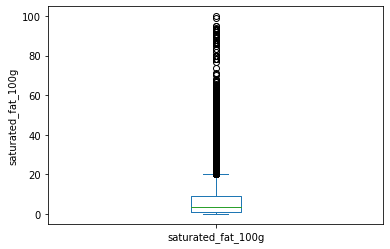

count   193799.0
mean         3.1
std          1.5
min          0.0
25%          2.0
50%          3.0
75%          4.0
max          5.0
Name: nutrition_grade_fr, dtype: float64




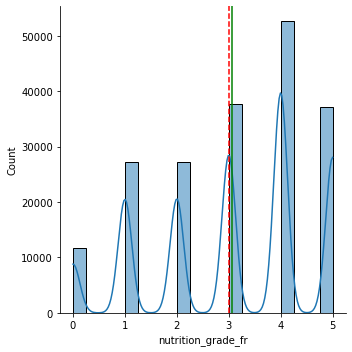

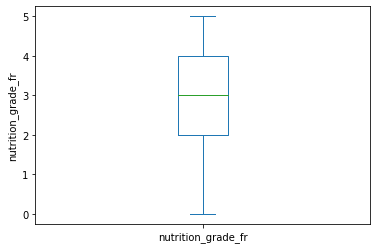

count   193799.0
mean        10.9
std          7.6
min          1.0
25%          3.3
50%         10.7
75%         17.0
max         40.0
Name: nutrition_score_fr_100g, dtype: float64




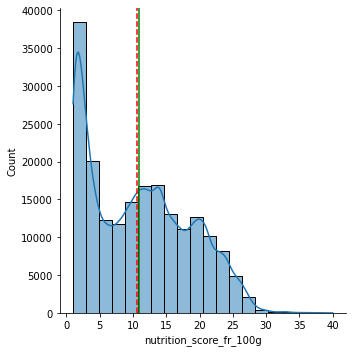

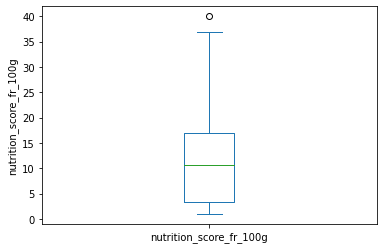

count   193799.0
mean         4.6
std          4.7
min          0.0
25%          1.8
50%          3.5
75%          6.2
max        100.0
Name: fiber_100g, dtype: float64




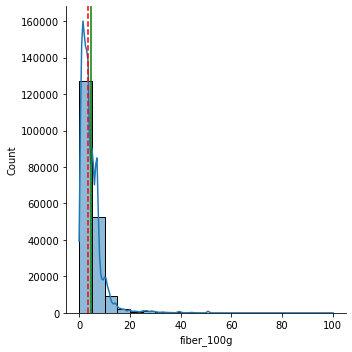

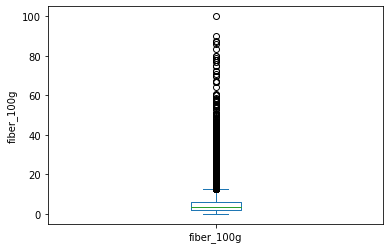

count   193799.0
mean         0.1
std          0.3
min          0.0
25%          0.0
50%          0.0
75%          0.1
max         95.2
Name: cholesterol_100g, dtype: float64




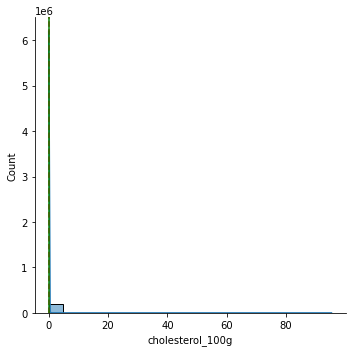

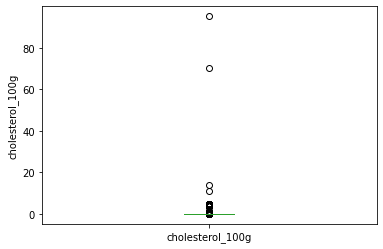

count   193799.0
mean         3.8
std          7.0
min          0.0
25%          0.6
50%          1.4
75%          3.7
max        100.0
Name: trans_fat_100g, dtype: float64




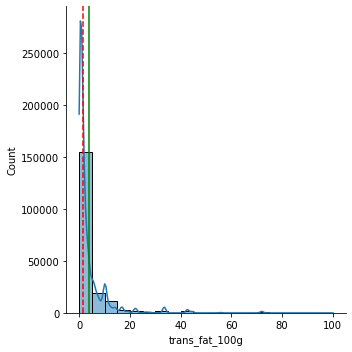

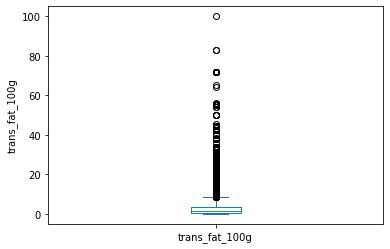

count   193799.0
mean         0.1
std          0.7
min          0.0
25%          0.0
50%          0.1
75%          0.1
max         99.0
Name: calcium_100g, dtype: float64




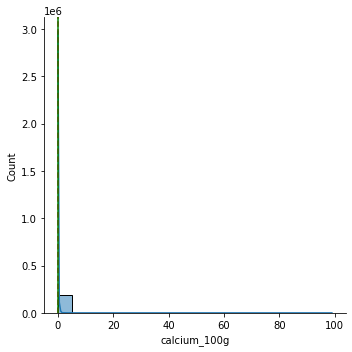

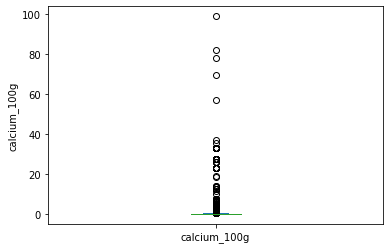

count   193799.0
mean         0.0
std          0.3
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         50.0
Name: vitamin_c_100g, dtype: float64




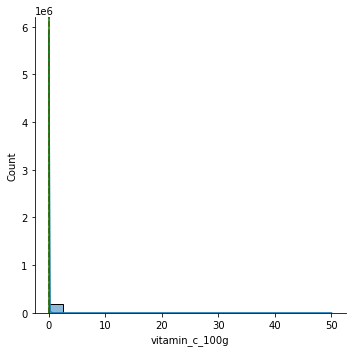

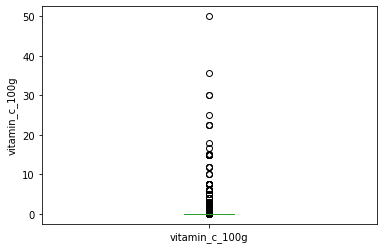

count   193799.0
mean         0.0
std          0.1
min          0.0
25%          0.0
50%          0.0
75%          0.0
max         25.0
Name: iron_100g, dtype: float64




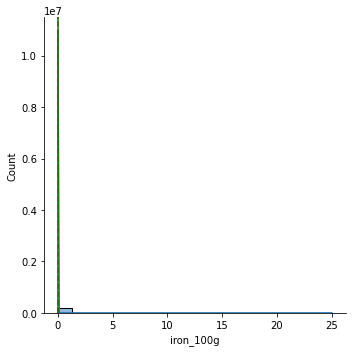

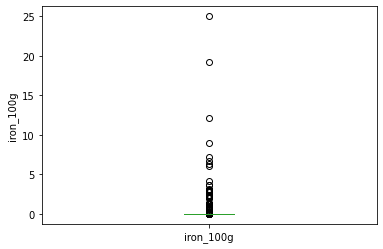

count   193799.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.8
Name: vitamin_a_100g, dtype: float64




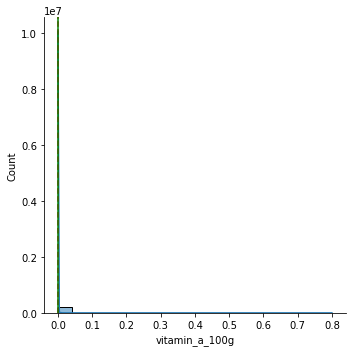

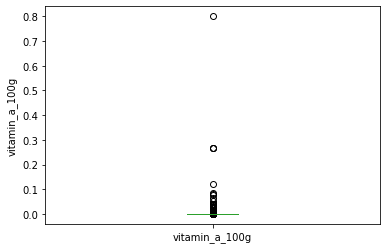

In [12]:
analyse_univariable(data)



- Aucune variable ne suit une loi normale car la fonction de densité de probabilités de la loi normale à la forme d'une courbe en cloche symétrique.

Certaines variables sont discrètes:

- nutrition-score-fr_100g
- additives_n

# Heatmap de correlation 

In [13]:
def add_correlation_heatmap(dataframe):
    plt.figure(figsize=(20, 20))
    corr = dataframe.corr(method='pearson')
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.show()
    return 


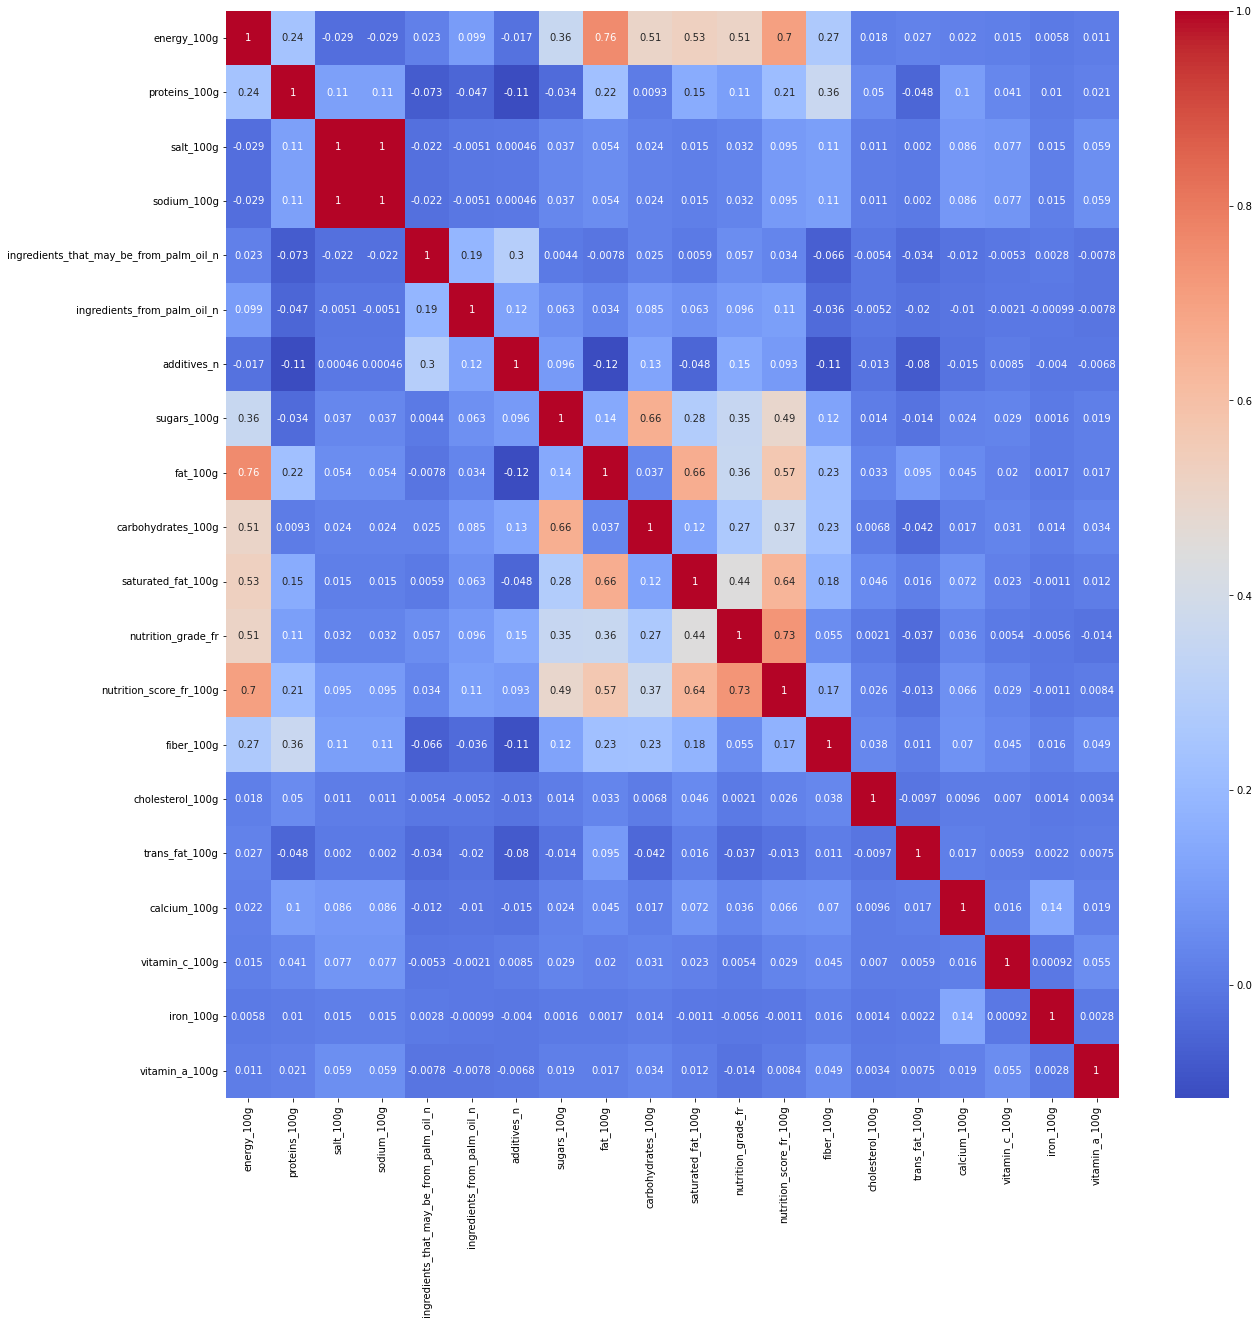

In [14]:
add_correlation_heatmap(data)


 On peut observer des corrélations qui sont logiques entre sucre et carbohydrate, fat et satured fat, sodium et sel.
On observe aussi une corrélation entre le sucre et le carbohydrate avec l'energy.



# Nutriscore

In [15]:
def replace_values(df, column_name):
    mapping = {1 : 'a', 2 : 'b', 3: 'c', 4: 'd', 5: 'e', 0 : 'non renseigné'}
    df[column_name].replace(mapping, inplace=True)
    
    return df


In [16]:
data2 = replace_values(data, 'nutrition_grade_fr')

In [17]:
data2

,countries_fr,product_name,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,additives,...,nutrition_grade_fr,nutrition_score_fr_100g,fiber_100g,additives_fr,cholesterol_100g,trans_fat_100g,calcium_100g,vitamin_c_100g,iron_100g,vitamin_a_100g
0,États-Unis,Peanuts,1941.0,17.9,0.6,0.2,0.0,0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,...,b,10.0,7.1,NaN,0.0,5.4,0.1,0.0,0.0,0.0
1,États-Unis,Organic Salted Nut Mix,2540.0,17.9,1.2,0.5,0.0,0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,...,d,12.0,7.1,NaN,0.0,16.8,0.1,0.0,0.0,0.0
2,États-Unis,Breadshop Honey Gone Nuts Granola,1933.0,13.5,0.9,0.3,0.0,0.0,0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,...,non renseigné,12.7,7.7,NaN,0.1,3.6,0.0,0.0,0.0,0.0
3,États-Unis,Organic Muesli,1833.0,14.1,0.1,0.1,0.0,0.0,2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,...,c,7.0,9.4,"E123 - Amarante,E307a - Tocophérol",0.1,4.9,0.1,0.0,0.0,0.0
4,États-Unis,Organic Dark Chocolate Minis,2406.0,5.0,0.1,0.0,0.0,0.0,0.0,[ organic-chocolate-liquor -> en:organic-choc...,...,non renseigné,21.0,7.5,NaN,0.0,1.4,0.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193794,Royaume-Uni,Santa Cruz Chilli & Lime Dressing,660.0,0.3,0.5,0.2,0.0,0.0,1.0,[ water -> en:water ] [ sugar -> en:sugar ...,...,c,6.0,0.6,E415 - Gomme xanthane,0.0,5.8,0.1,0.0,0.0,0.0
193795,France,Fisherman's Friend Miel-Citron,1031.0,0.0,0.0,0.0,1.0,0.0,5.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,...,b,2.0,1.5,"E420 - Sorbitol,E955 - Sucralose,E950 - Acésul...",0.0,1.0,0.1,0.0,0.0,0.0
193796,États-Unis,Organic Z Bar,1393.0,5.6,1.0,0.4,0.0,0.0,1.0,[ organic-oat-blend -> en:organic-oat-blend ...,...,d,11.0,8.3,E322 - Lécithines,0.1,7.0,0.6,0.1,0.0,0.0
193797,États-Unis,Natural Cassava,1477.0,1.2,0.0,0.0,0.0,0.0,0.0,[ cassava -> en:cassava ],...,a,9.7,4.7,NaN,0.1,0.8,0.1,0.0,0.0,0.0


In [18]:

def plot_pie_chart(dataframe, column):
    # Compter les valeurs uniques dans la colonne spécifiée
    values = dataframe[column].value_counts()
    # Créer le diagramme circulaire
    plt.pie(values, labels=values.index, autopct='%1.1f%%')
    plt.title(f"Répartition des valeurs uniques dans la colonne {column}")
    plt.show()


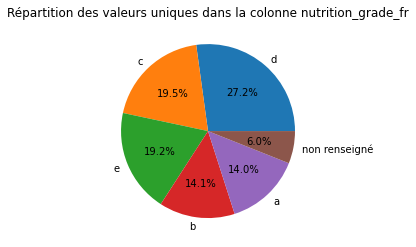

In [19]:
plot_pie_chart(data2, 'nutrition_grade_fr')

# Reduction du dataframe pour le nutriscore 

l'application que je souhaite mettre en place va se surtout se basé sur le nutriscore. Je vais donc reduire le dataframe avec les ingredient contenue dans le calcul du nutriscore.

L'application que je souhaite mettre en place va ce surtout se baser sur le nutriscore. Je vais donc réduire le dataframe avec les ingrédients contenue dans le calcul du nutriscore.

Pour calculer le Nutriscore, les critères suivants sont pris en compte :

- Teneur en sucre
- Teneur en graisses saturées
- Teneur en sel
- Teneur en fibres
- Teneur en protéines

Chaque critère est pondéré différemment pour refléter son impact sur la santé et les aliments sont classés en conséquence. Les aliments riches en fibres, protéines et pauvres en sucres, graisses saturées et sel auront un score Nutriscore élevé, tandis que les aliments riches en sucres, graisses saturées et sel et pauvres en fibres et protéines auront un score Nutriscore faible.


In [20]:
data_nutri = data2[['nutrition_score_fr_100g','saturated_fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g','fiber_100g']]

# Loi Normal

In [21]:


def check_normal_distribution(data):
    # Test de Shapiro-Wilk pour vérifier si les données suivent une loi normale
    shapiro_results = stats.shapiro(data)
    if shapiro_results[1] > 0.05:
        print("Les données suivent une loi normale")
    else:
        print("Les données ne suivent pas une loi normale")
    return shapiro_results


In [22]:
check_normal_distribution(data_nutri)

Les données ne suivent pas une loi normale


/Users/niya/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.644270122051239, pvalue=0.0)

La distribution non-normale des variables dépendantes nous empêche de faire un test anova. Il est cependant possible de faire un test non-paramétrique.

# Test de Kruskal-Wallis

Le test de Kruskal-Wallis est un test non paramétrique qui permet de vérifier si les moyennes de plusieurs échantillons indépendants sont égales. Il est similaire au test t de Student, mais il peut être utilisé avec des données non normales ou avec des échantillons de tailles différentes.

In [23]:

def test_kruskal_wallis2(data1, data2):
    # Réaliser le test de Kruskal-Wallis
    stat, p_value = kruskal(data1, data2)
    print('Statistique: %.3f, p-value: %.3f' % (stat, p_value))
    if p_value < 0.05:
        print("Nous rejetons l'hypothèse nulle, il existe une différence significative entre les moyennes")
    else:
        print("Nous ne pouvons pas rejeter l'hypothèse nulle, il n'y a pas de différence significative entre les moyennes")


In [24]:
test_kruskal_wallis2(data_nutri['nutrition_score_fr_100g'],data_nutri['proteins_100g'])

Statistique: 6584.155, p-value: 0.000
Nous rejetons l'hypothèse nulle, il existe une différence significative entre les moyennes


Et maintenant avec toutes les colonnes du dataframe 

In [25]:



def kruskal_wallis_df(df, col_ref):
    results = []
    for col in df.columns:
        if col == col_ref or df[col].dtype != 'float64':
            continue
        stat, p_value = kruskal(df[col_ref], df[col])
        results.append([col, stat, p_value])
    return pd.DataFrame(results, columns=['colonne', 'statistic', 'p_value'])



In [26]:
kruskal_wallis_df(data_nutri,'nutrition_score_fr_100g')

,colonne,statistic,p_value
0,saturated_fat_100g,45883.5,0.0
1,carbohydrates_100g,65704.4,0.0
2,sugars_100g,779.0,0.0
3,proteins_100g,6584.2,0.0
4,salt_100g,217987.3,0.0
5,sodium_100g,271384.6,0.0
6,fiber_100g,70747.4,0.0


In [ ]:
le lien entre les ingrédients et le nutriscore est verifié.

In [27]:

def perform_bivariate_analysis(dataframe, column1, column2):
    # Utiliser la fonction boxplot de Seaborn pour visualiser les données
    sns.boxplot(x=column2, y=column1, data=dataframe)
    plt.show()


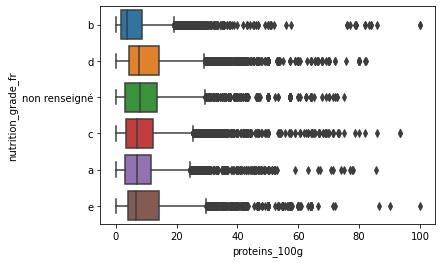

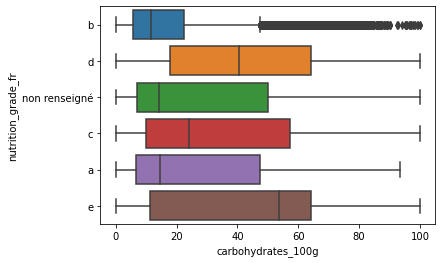

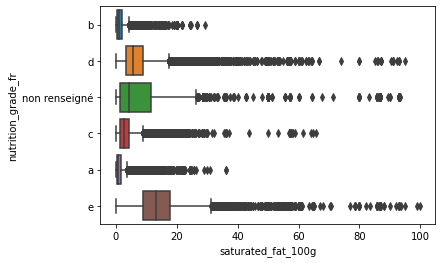

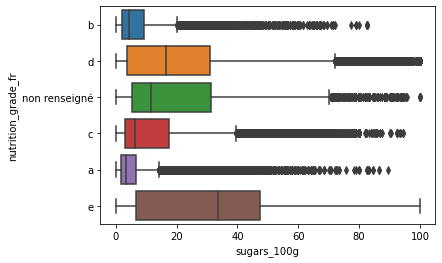

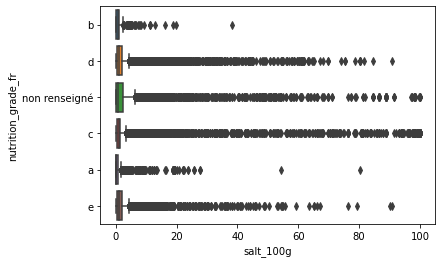

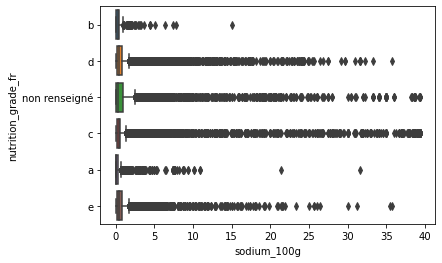

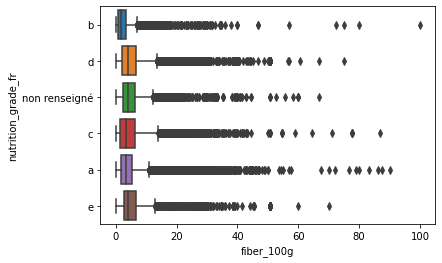

In [28]:
perform_bivariate_analysis(data2, data2['nutrition_grade_fr'],data2['proteins_100g'])
perform_bivariate_analysis(data2, data2['nutrition_grade_fr'],data2['carbohydrates_100g'])
perform_bivariate_analysis(data2, data2['nutrition_grade_fr'],data2['saturated_fat_100g'])
perform_bivariate_analysis(data2, data2['nutrition_grade_fr'],data2['sugars_100g'])

perform_bivariate_analysis(data2, data2['nutrition_grade_fr'],data2['salt_100g'])
perform_bivariate_analysis(data2, data2['nutrition_grade_fr'],data2['sodium_100g'])


perform_bivariate_analysis(data2, data2['nutrition_grade_fr'],data2['fiber_100g'])

- Produit sucré et gras sont majoritairement représenté en E et D.
- Les autres produits sont à peu près repartis également entre les différents grades.  



In [29]:
data_nutri2 = data2[['nutrition_grade_fr','saturated_fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g','fiber_100g']]

In [30]:
def plot_mean_by_nutriscore(data):
    nutriscore_column = "nutrition_grade_fr"
    for column in data.columns:
        if column == nutriscore_column:
            continue
        grouped = data.groupby(nutriscore_column).mean()
        grouped.plot(kind="bar", y=column)
        plt.xlabel("Nutriscore")
        plt.ylabel("Mean Value")
        plt.title(f"Mean {column} by Nutriscore")
        plt.show()



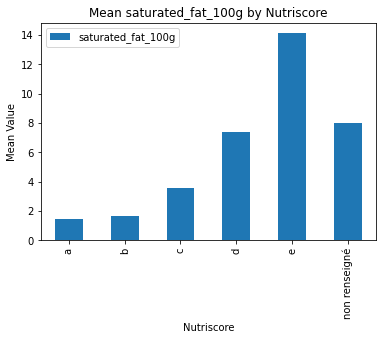

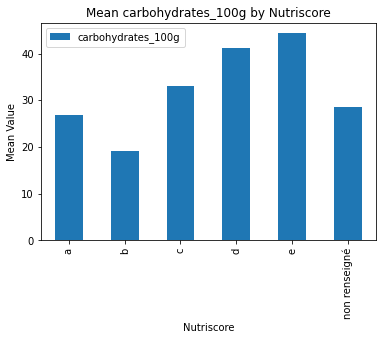

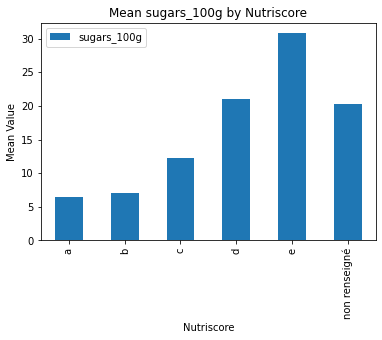

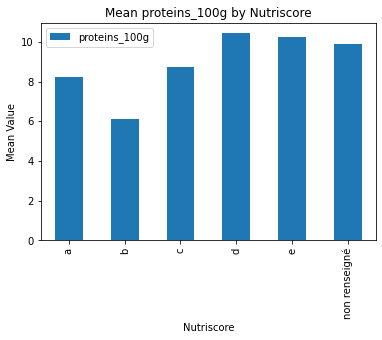

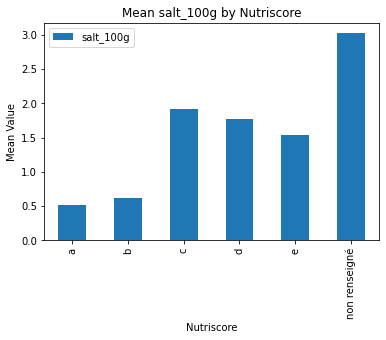

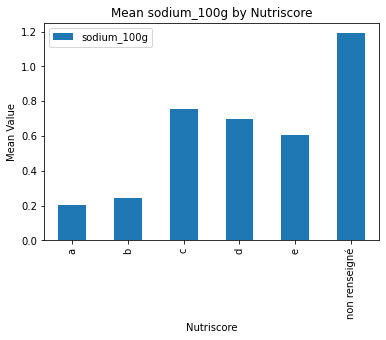

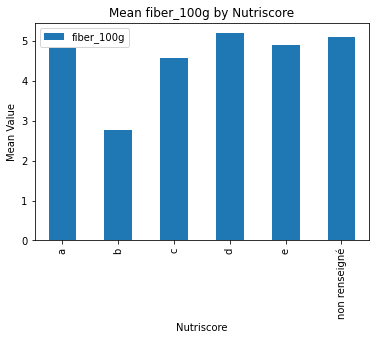

In [31]:
plot_mean_by_nutriscore(data_nutri2)

- satured fat a beaucoup de produits catégorisés en E (donc mauvais produit) et très peu en A.
- Les produits contenant du sucre et carbohydrate sont aussi plus catégorisé en E.
- Pour sel et sodium, le plus grand nombre de produits sont regroupés dans la classe C
- Pour fibre, les quantités sont à peu près égales pour le score A C D E


# Analyse Multi, PCA et cercle de corrélation

In [32]:
data_pca = data_nutri[['saturated_fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g','fiber_100g']]

In [33]:


X = data_pca
keep_ind = X.index
X = StandardScaler().fit_transform(X)



In [34]:
n_components = 7
pca = PCA(n_components=n_components)

pca.fit(X)
var = pca.explained_variance_ratio_
var

array([3.04209150e-01, 2.58630082e-01, 1.83484902e-01, 1.24353772e-01,
       8.58403108e-02, 4.34817806e-02, 2.45246931e-09])

In [35]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([30.42, 25.86, 18.35, 12.44,  8.58,  4.35,  0.  ])

In [36]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 30.,  56.,  75.,  87.,  96., 100., 100.])

In [37]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

In [38]:
def create_pca_explained_variance_table(pca):
    var = pca.explained_variance_ratio_*100
    explained_variance_table = pd.DataFrame({'Composante principale': range(1, len(var)+1),
                                            'Pourcentage de variance expliquée': var})
    explained_variance_table['Pourcentage de variance expliquée cumulé'] = explained_variance_table['Pourcentage de variance expliquée'].cumsum()
    return explained_variance_table

In [39]:
create_pca_explained_variance_table(pca)

,Composante principale,Pourcentage de variance expliquée,Pourcentage de variance expliquée cumulé
0,1,30.4,30.4
1,2,25.9,56.3
2,3,18.3,74.6
3,4,12.4,87.1
4,5,8.6,95.7
5,6,4.3,100.0
6,7,0.0,100.0


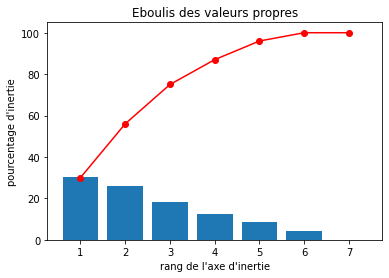

In [40]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [41]:
pcs = pca.components_
pcs

array([[ 1.85898516e-01,  2.58527801e-01,  2.60341611e-01,
         2.31310657e-01,  5.87287637e-01,  5.87287510e-01,
         2.95819802e-01],
       [-3.16659826e-01, -5.37212303e-01, -5.47092588e-01,
        -4.81987447e-02,  3.57542315e-01,  3.57542349e-01,
        -2.31997929e-01],
       [ 2.18579783e-01, -2.79157761e-01, -3.35325600e-01,
         6.73116193e-01, -1.59310607e-01, -1.59311311e-01,
         5.07942115e-01],
       [ 8.71786889e-01, -3.24535548e-01,  2.07252122e-02,
        -1.34950932e-01,  4.00303195e-02,  4.00304613e-02,
        -3.35884127e-01],
       [ 1.22799657e-01, -1.00759066e-01, -1.90090477e-01,
        -6.87469297e-01,  8.35741069e-03,  8.35541320e-03,
         6.82553860e-01],
       [-2.05667304e-01, -6.71685604e-01,  6.95632636e-01,
         1.61574459e-02, -1.43021494e-02, -1.43015692e-02,
         1.48204235e-01],
       [-3.03602763e-07, -6.28661952e-08,  6.86506912e-07,
         6.06903419e-07,  7.07106803e-01, -7.07106760e-01,
        -1.2220687

In [42]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.2,0.3,0.3,0.2,0.6,0.6,0.3
1,-0.3,-0.5,-0.5,-0.0,0.4,0.4,-0.2
2,0.2,-0.3,-0.3,0.7,-0.2,-0.2,0.5
3,0.9,-0.3,0.0,-0.1,0.0,0.0,-0.3
4,0.1,-0.1,-0.2,-0.7,0.0,0.0,0.7
5,-0.2,-0.7,0.7,0.0,-0.0,-0.0,0.1
6,-0.0,-0.0,0.0,0.0,0.7,-0.7,-0.0


In [43]:
features =['saturated_fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g','fiber_100g']

In [44]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,saturated_fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fiber_100g
F1,0.2,0.3,0.3,0.2,0.6,0.6,0.3
F2,-0.3,-0.5,-0.6,-0.1,0.4,0.4,-0.2
F3,0.2,-0.3,-0.3,0.7,-0.2,-0.2,0.5
F4,0.9,-0.3,0.0,-0.1,0.0,0.0,-0.3
F5,0.1,-0.1,-0.2,-0.7,0.0,0.0,0.7
F6,-0.2,-0.7,0.7,0.0,-0.0,-0.0,0.1
F7,-0.0,-0.0,0.0,0.0,0.7,-0.7,-0.0


In [45]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7
saturated_fat_100g,0.2,-0.3,0.2,0.9,0.1,-0.2,-0.0
carbohydrates_100g,0.3,-0.5,-0.3,-0.3,-0.1,-0.7,-0.0
sugars_100g,0.3,-0.5,-0.3,0.0,-0.2,0.7,0.0
proteins_100g,0.2,-0.0,0.7,-0.1,-0.7,0.0,0.0
salt_100g,0.6,0.4,-0.2,0.0,0.0,-0.0,0.7
sodium_100g,0.6,0.4,-0.2,0.0,0.0,-0.0,-0.7
fiber_100g,0.3,-0.2,0.5,-0.3,0.7,0.1,-0.0


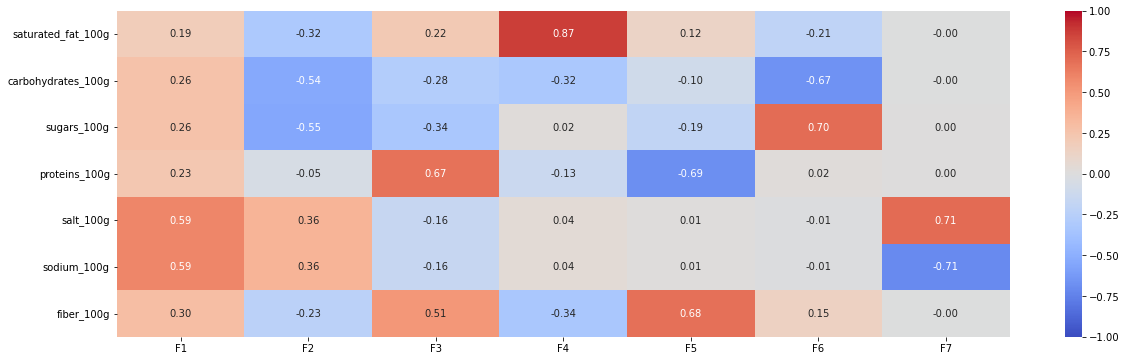

In [46]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

In [47]:
x, y = 0,1

In [48]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    #Titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

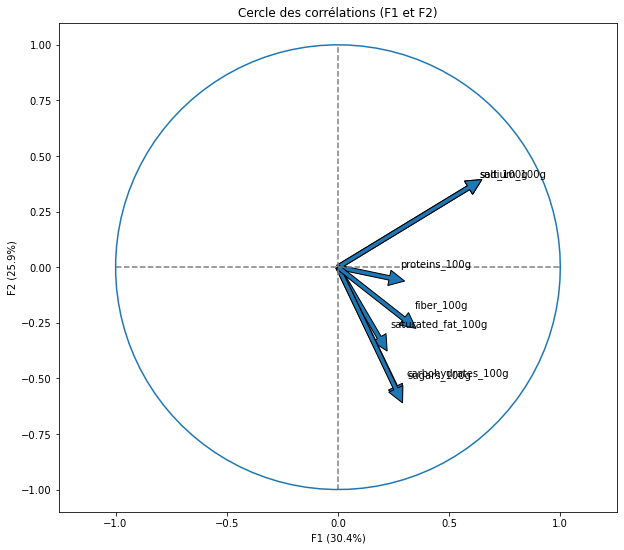

In [49]:


correlation_graph(pca,(0,1),features)


- F1 représente surtout les produit sucré, on observe naturellement une corrélation entre le sucre et carbohydrate
- F2 représente les produits salés, on observe naturellement une corrélation entre le sel et le sodium.

Une petite flèche dans un cercle de corrélation correspond à une faible corrélation.
Il est préférable de n’interpréter que les flèches les plus longues, car les flèches les plus petites correspondent à des variables dites « mal représenté ».
Interprétons maintenant F3 et F4 pour les autres variables.



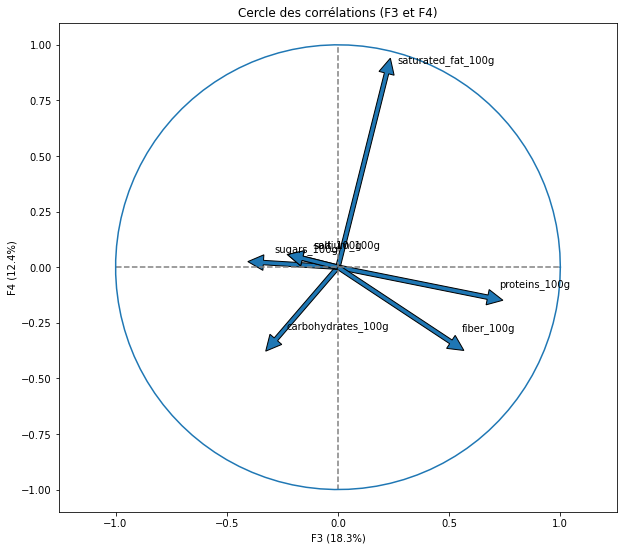

In [51]:
correlation_graph(pca,(2,3),features)

- F3 représente les produits fort en protéine et fibre, une assez bonne corrélation entre eux
- F4 représente les produit fort en gras saturé


# Kmeans

In [66]:
data_nutri

,nutrition_score_fr_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fiber_100g
0,10.0,5.3,60.7,17.9,17.9,0.6,0.2,7.1
1,12.0,5.4,17.9,3.6,17.9,1.2,0.5,7.1
2,12.7,1.9,63.5,11.5,13.5,0.9,0.3,7.7
3,7.0,4.7,57.8,15.6,14.1,0.1,0.1,9.4
4,21.0,22.5,55.0,42.5,5.0,0.1,0.0,7.5
...,...,...,...,...,...,...,...,...
193794,6.0,0.5,23.1,16.7,0.3,0.5,0.2,0.6
193795,2.0,1.3,95.3,0.1,0.0,0.0,0.0,1.5
193796,11.0,2.8,61.1,30.6,5.6,1.0,0.4,8.3
193797,9.7,2.3,87.1,2.4,1.2,0.0,0.0,4.7


In [67]:

def kmeans_cluster(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    df['cluster'] = kmeans.predict(df)
    return df

In [68]:
kmeansb = kmeans_cluster(data_nutri,5)
kmeansb

C:\Users\boukh\AppData\Local\Temp\ipykernel_6036\2455376450.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(df)


,nutrition_score_fr_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fiber_100g,cluster
0,10.0,5.3,60.7,17.9,17.9,0.6,0.2,7.1,2
1,12.0,5.4,17.9,3.6,17.9,1.2,0.5,7.1,4
2,12.7,1.9,63.5,11.5,13.5,0.9,0.3,7.7,2
3,7.0,4.7,57.8,15.6,14.1,0.1,0.1,9.4,2
4,21.0,22.5,55.0,42.5,5.0,0.1,0.0,7.5,1
...,...,...,...,...,...,...,...,...,...
193794,6.0,0.5,23.1,16.7,0.3,0.5,0.2,0.6,0
193795,2.0,1.3,95.3,0.1,0.0,0.0,0.0,1.5,2
193796,11.0,2.8,61.1,30.6,5.6,1.0,0.4,8.3,2
193797,9.7,2.3,87.1,2.4,1.2,0.0,0.0,4.7,2


In [69]:


def plot_kmeans(df, n_clusters):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    df['cluster'] = kmeans.predict(df)
    
    # Perform PCA to reduce the dimensions of the data to 2D
    pca = PCA(n_components=2)
    df_2d = pca.fit_transform(df)
    
    # Plot the data points with different colors for each cluster
    plt.scatter(df_2d[:,0], df_2d[:,1], c=df['cluster'], cmap='viridis')
    plt.show()


C:\Users\boukh\AppData\Local\Temp\ipykernel_6036\3546134407.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(df)


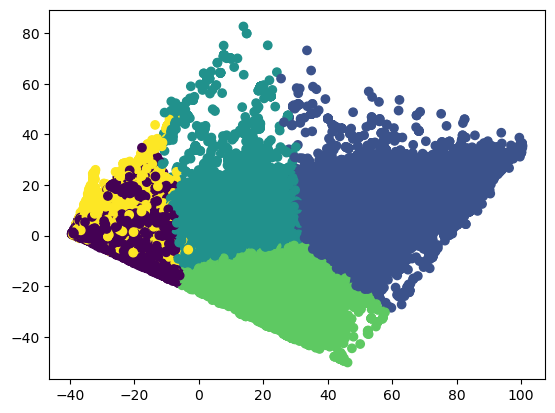

In [70]:
plot_kmeans(data_nutri, 5)

In [73]:


def optimize_kmeans(X, max_clusters):
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
        
    plt.plot(range(1, max_clusters + 1), sse)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Elbow Method for Optimal K")
    plt.show()
    return



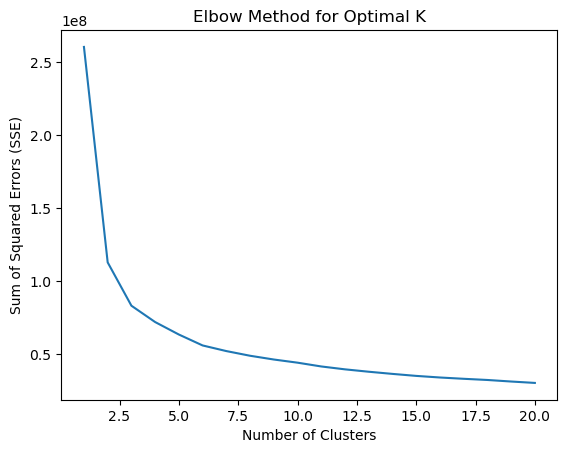

In [74]:
optimize_kmeans(data_nutri, 20)

on peut voir une premiere cassure aux alentours de 2.5

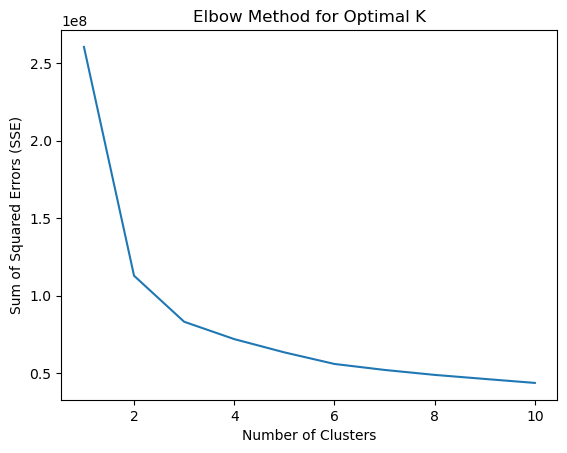

In [75]:
optimize_kmeans(data_nutri, 10)

une premiere cassure entre 2 et 3

In [76]:
XX = data_nutri.values

In [88]:
kmeanss = KMeans(n_clusters=3)

In [89]:
kmeanss.fit(XX)

KMeans(n_clusters=3)

In [90]:
labels = kmeanss.labels_


In [91]:

silhouette_score(XX, labels)

0.4371235417706307

In [81]:

def analyse_silhouette(X2, n_clusters_liste):
    """
    Effectue une analyse de la silhouette pour différents nombres de clusters.
    
    Paramètres:
    X (numpy array): Les valeurs des caractéristiques.
    n_clusters_liste (liste): Une liste de nombres de clusters à tester.
    
    Retourne:
    meilleur_n_clusters (int): Le nombre de clusters avec le plus haut score de silhouette.
    meilleur_score_silhouette (float): Le plus haut score de silhouette.
    """
    meilleur_score_silhouette = -1
    meilleur_n_clusters = -1
    
    for n_clusters in n_clusters_liste:
        # Créer une instance de KMeans
        kmeans = KMeans(n_clusters=n_clusters)
        
        # Ajuster le modèle KMeans aux données
        kmeans.fit(X2)
        
        # Prédire les étiquettes de cluster pour chaque point de données
        étiquettes = kmeans.labels_
        
        # Calculer le score de silhouette pour le modèle
        score_silhouette = silhouette_score(X2, étiquettes)
        
        # Mettre à jour le meilleur score de silhouette et le nombre de clusters si le score actuel est meilleur
        if score_silhouette > meilleur_score_silhouette:
            meilleur_score_silhouette = score_silhouette
            meilleur_n_clusters = n_clusters
    
    return meilleur_n_clusters, meilleur_score_silhouette



In [82]:


# Extraire les valeurs des caractéristiques sous forme de tableau numpy
X2 = data_nutri.values

# Définir la plage de nombres de clusters à tester
n_clusters_liste = range(2, 8)

# Effectuer l'analyse de la silhouette
meilleur_n_clusters, meilleur_score_silhouette = analyse_silhouette(X2, n_clusters_liste)

print("Meilleur nombre de clusters: {}".format(meilleur_n_clusters))
print("Meilleur score de silhouette: {:.3f}".format(meilleur_score_silhouette))


Meilleur nombre de clusters: 2
Meilleur score de silhouette: 0.504


C:\Users\boukh\AppData\Local\Temp\ipykernel_6036\3546134407.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(df)


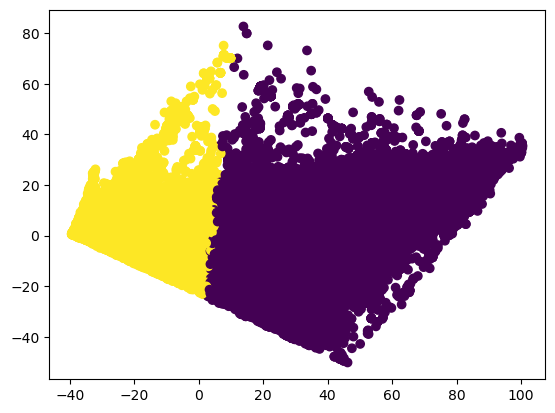

In [83]:
plot_kmeans(data_nutri, 2)

In [84]:
d_clean = kmeans_cluster(data_nutri,2)

C:\Users\boukh\AppData\Local\Temp\ipykernel_6036\2455376450.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(df)


In [85]:
d_clean

,nutrition_score_fr_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fiber_100g,cluster
0,10.0,5.3,60.7,17.9,17.9,0.6,0.2,7.1,1
1,12.0,5.4,17.9,3.6,17.9,1.2,0.5,7.1,0
2,12.7,1.9,63.5,11.5,13.5,0.9,0.3,7.7,1
3,7.0,4.7,57.8,15.6,14.1,0.1,0.1,9.4,1
4,21.0,22.5,55.0,42.5,5.0,0.1,0.0,7.5,1
...,...,...,...,...,...,...,...,...,...
193794,6.0,0.5,23.1,16.7,0.3,0.5,0.2,0.6,0
193795,2.0,1.3,95.3,0.1,0.0,0.0,0.0,1.5,1
193796,11.0,2.8,61.1,30.6,5.6,1.0,0.4,8.3,1
193797,9.7,2.3,87.1,2.4,1.2,0.0,0.0,4.7,1


In [86]:
cluster_1 = d_clean[d_clean['cluster'] == 1]
cluster_1.describe()

,nutrition_score_fr_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fiber_100g,cluster
count,81627.0,81627.0,81627.0,81627.0,81627.0,81627.0,81627.0,81627.0,81627.0
mean,14.7,8.0,63.2,31.2,9.1,1.7,0.7,5.8,1.0
std,6.8,7.7,14.1,21.3,6.8,5.9,2.3,5.4,0.0
min,1.0,0.0,3.3,0.0,0.0,0.0,0.0,0.0,1.0
25%,10.0,2.3,52.9,10.7,5.0,0.2,0.1,2.9,1.0
50%,14.0,5.4,62.8,30.9,7.1,0.8,0.3,4.0,1.0
75%,20.0,12.1,73.0,46.0,11.1,1.5,0.6,7.1,1.0
max,40.0,90.0,100.0,100.0,100.0,100.0,39.4,100.0,1.0


In [87]:
cluster_2 = d_clean[d_clean['cluster'] == 0]
cluster_2.describe()

,nutrition_score_fr_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fiber_100g,cluster
count,112172.0,112172.0,112172.0,112172.0,112172.0,112172.0,112172.0,112172.0,112172.0
mean,8.1,5.1,13.4,6.9,9.1,1.3,0.5,3.8,0.0
std,6.8,7.1,10.7,7.4,8.7,3.1,1.2,3.8,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,0.9,4.7,2.0,2.7,0.2,0.1,1.3,0.0
50%,5.0,2.5,10.5,3.8,6.0,0.8,0.3,2.7,0.0
75%,13.0,6.9,20.0,9.8,14.0,1.5,0.6,5.4,0.0
max,32.0,99.9,48.7,88.9,86.4,100.0,39.4,87.5,0.0


- on observe que les quantités d'ingrédients sont plus élevé dans le cluster 1
- il y a plus de produits dans le cluster 2
- le nutrition_score_fr_100g est plus élever en moyenne dans le cluster 1, les produits ont donc un grade moins bon que le cluster.
- le cluster 1 regroupe les produits très sucrés. 


# Conclusion

Faisabilité de l’application :

- Corrélation et lien entre différents ingrédients et nutriscore, on voit certains produits sont majoritaire dans certains grades de nutriscore. (Exemple : le sucre est majoritaire en E)
- Nutriscore a amélioré.
- Il est nécessaire d'avoir un expert en nutrition pour mettre en place le scoring ainsi que les différents coefficients.
- Cluster difficile. Seulement 2 clusters, c'est trop peu pour pouvoir améliorer le choix et le rendement de l'application


Axe d'amélioration :

- Système de recette. Création de nombreux groupe en fonction des recettes résous légèrement le problème de seulement 2 clusters d'un point de vue statistiques. Les recettes doivent obtenir en moyenne un bon score en fonction des différents ingrédients.
- Amélioration de la base de données.
- Création d’un nouveau Nutriscore. (Prends en compte plus d’ingrédients).
- Ajout d'autre régime alimentaire.

   
